/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Prediction: 1


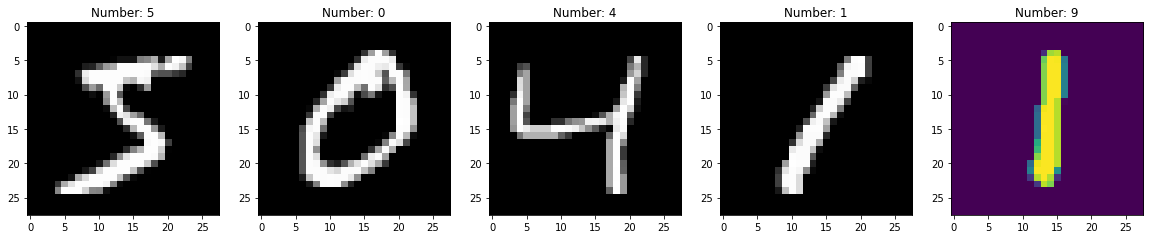

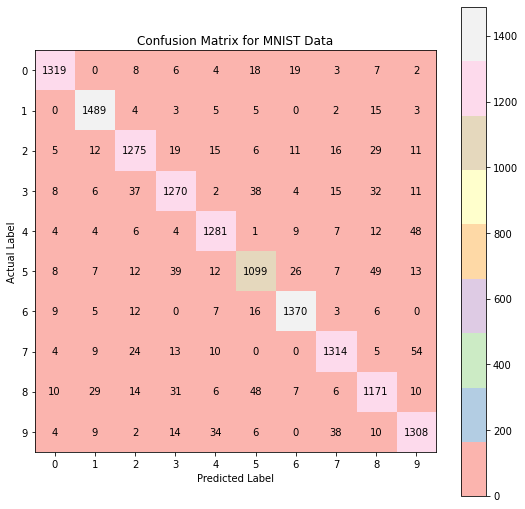

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

mnist = fetch_openml("mnist_784")

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap="gray")
    plt.title("Number: %s" % label)
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)
mdl = LogisticRegression(solver="lbfgs")
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)

index = 1
plt.imshow(np.reshape(X_test[index], (28, 28)))
print("Prediction: " + mdl.predict([X_test[index]])[0])

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')
